In [ ]:
%%capture
!pip install powerlaw

In [ ]:
import pandas as pd
import networkx as nx
from operator import itemgetter
from networkx.algorithms import community
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α
import community as community_louvain

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
nodes = pd.read_csv('/content/gdrive/MyDrive/PlayStore Data/Dataset.csv')
edges = pd.read_csv('/content/gdrive/MyDrive/PlayStore Data/Edges.csv',sep='\t')

In [ ]:
len(nodes),len(edges)

(57590, 29533258)

In [ ]:
edges.drop_duplicates(subset=['Source','Target'],inplace = True)

In [ ]:
len(edges)

22151501

In [ ]:
G = nx.from_pandas_edgelist(edges,'Source',"Target",["interaction"]) # create graph

In [ ]:
del edges

In [ ]:
nodeAttributes = ['price','scoreText','category']

In [ ]:
for attribute in nodeAttributes:
  nx.set_node_attributes(G,dict(zip(nodes['appId'],nodes[attribute])),name = attribute)

In [ ]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 45813
Number of edges: 22151501
Average degree: 967.0400


In [ ]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.02110887904526422


In [ ]:
print(nx.is_connected(G))

False


In [ ]:
nx.number_connected_components(G)

8

In [ ]:
components = nx.connected_components(G)
graphs = []
for c in components:
  graphs.append(G.subgraph(c))
for g in graphs:
  print(nx.info(g))
  print('-'*20)

Name: 
Type: Graph
Number of nodes: 45798
Number of edges: 22151492
Average degree: 967.3563
--------------------
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
--------------------
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
--------------------
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
--------------------
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
--------------------
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
--------------------
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
--------------------
Name: 
Type: Graph
Number of nodes: 3
Number of edges: 3
Average degree:   2.0000
--------------------


In [ ]:
density = nx.density(graphs[0])
print("Network density of largest component:", density)

Network density of largest component: 0.02112270025915941


In [ ]:
del components, graphs

In [ ]:
# This cell is taking too much time

# largest_component = max(components, key=len)
# subgraph = G.subgraph(largest_component)
# diameter = nx.diameter(subgraph)
# print("Network diameter of largest component:", diameter)

In [ ]:
degree_centrality = dict(G.degree(G.nodes()))
sorted_degree = sorted(degree_centrality.items(), key=itemgetter(1), reverse=True)

In [ ]:
print("Top 10 Apps by degree:")
for d in sorted_degree[:10]:
  print('App Name:',d[0])
  print('Degree:',d[1])
  for key,value in G.nodes[d[0]].items():
    print(key+":",value)
  print('-'*20)

Top 10 Apps by degree:
App Name: net.tsapps.appsales
Degree: 4211
price: 0.0
scoreText: 4.3
category: SHOPPING
--------------------
App Name: com.technologies.subtlelabs.doodhvale
Degree: 3906
price: 0.0
scoreText: 4.4
category: FOOD_AND_DRINK
--------------------
App Name: com.snapbreak.doors
Degree: 3883
price: 0.0
scoreText: 4.5
category: GAME_PUZZLE
--------------------
App Name: com.gamexis.sniper.professional.action.game.apps
Degree: 3868
price: 0.0
scoreText: 4.1
category: GAME_ACTION
--------------------
App Name: com.randomvideochat.livevideochat
Degree: 3856
price: 0.0
scoreText: 3.9
category: COMMUNICATION
--------------------
App Name: com.bigcodegames.doubleheadsharkattack
Degree: 3805
price: 0.0
scoreText: 3.9
category: GAME_CASUAL
--------------------
App Name: ninja.sesame.app.edge
Degree: 3801
price: 0.0
scoreText: 3.9
category: PERSONALIZATION
--------------------
App Name: imoblife.toolbox.full
Degree: 3791
price: 0.0
scoreText: 4.4
category: APPLICATION
------------

In [ ]:
del degree_centrality,sorted_degree

Text(0, 0.5, 'Frequency')

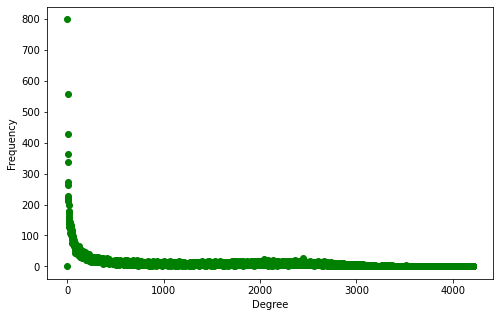

In [ ]:
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(8, 5)) 
plt.plot(degrees, degree_freq,'go') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [ ]:
del degree_freq,degrees

/usr/local/lib/python3.7/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/usr/local/lib/python3.7/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


1.173899208693163

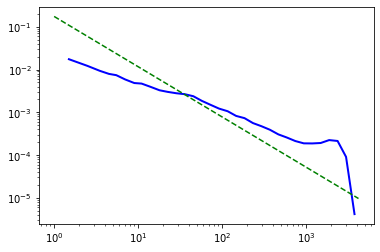

In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # used for degree distribution and powerlaw test
fit = powerlaw.Fit(degree_sequence, xmin=1)
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2);
fit.alpha